In [1]:
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
# %%
data = pd.read_csv("./archive.zip") # read the dataset directly from zip to save some disk space

# Part 1: Product category distribution

In [3]:
# %%
frequencies = data['category'].value_counts()
print(f"Top 5 most frequent categories are:")
for category in frequencies.head(5).index.to_list():
    print(category)
top_category = frequencies.index[0]
popularity_ratio = frequencies.iloc[0] / frequencies.iloc[1]

Top 5 most frequent categories are:
Sports & Outdoors
Beauty
Handmade Clothing, Shoes & Accessories
Bath & Body
Birthday Gifts


In [4]:
markdown_text = f"""
Samples of 20 random categories visualized as bar and pie charts are below.
The most frequent category is *{top_category}* and it's *{popularity_ratio:.1f}* times more popular than the next one.  
To make visualizations readable, we exclude it from sampling.
"""
display(Markdown(markdown_text))


Samples of 20 random categories visualized as bar and pie charts are below.
The most frequent category is *Sports & Outdoors* and it's *43.3* times more popular than the next one.  
To make visualizations readable, we exclude it from sampling.


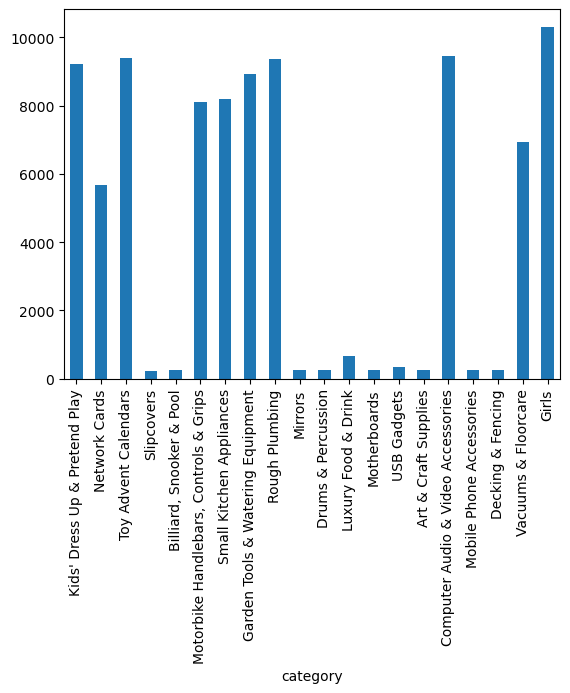

In [5]:
# %%
frequencies.iloc[1:].sample(20).plot.bar()
plt.show()

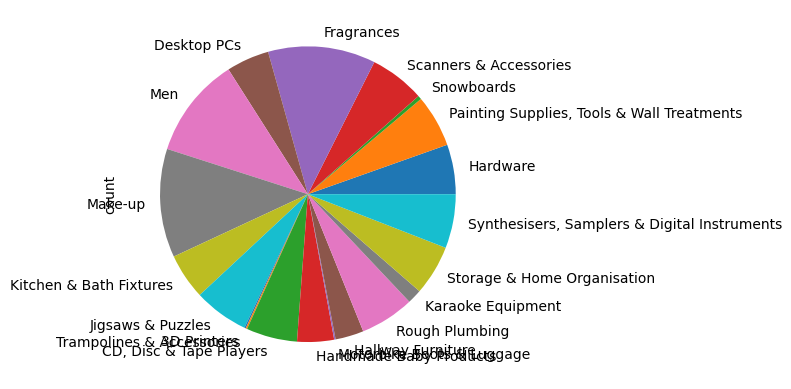

In [6]:
# %%
frequencies.iloc[1:].sample(20).plot.pie()
plt.show()

# Part 2: Prices distribution

In [7]:
# %%
prices = data.groupby("asin").nth(1).loc[:, "price"]
mean = prices.mean()
median = prices.median()
mode = prices.mode()[0]

In [8]:
variance = prices.var()
std = prices.std()
price_range = prices.max() - prices.min()
price_interquartile_range = prices.quantile(0.75) - prices.quantile(0.25)

In [9]:
# %%
markdown_text = f"""
## 1. Central tendency

Average price of products is *{mean:.2f}*, median price is *{median:.2f}*, and mode price is *{mode:.5f}*.
Average price is higher than the most frequent price in the dataset by *{(mean - mode):.2f}*.
"""
display(Markdown(markdown_text))


## 1. Central tendency

Average price of products is *41.05*, median price is *15.80*, and mode price is *9.99000*.
Average price is higher than the most frequent price in the dataset by *31.06*.


In [10]:
# %%
markdown_text = f"""
## 2. Dispersion

Spread of prices is great: *{price_range:.2f}*. Variance and standard deviation are great too *{variance:.2f}* and *{std:.2f}* correspondingly, especially comparing with sample mean of {mean:.2f}.

At the same time, interquartile range is only *{price_interquartile_range:.2f}*. This indicates that distribution has long tails but half of prices are very close to each other.
"""
display(Markdown(markdown_text))


## 2. Dispersion

Spread of prices is great: *7513.31*. Variance and standard deviation are great too *10994.12* and *104.85* correspondingly, especially comparing with sample mean of 41.05.

At the same time, interquartile range is only *26.04*. This indicates that distribution has long tails but half of prices are very close to each other.


## 3. Visualization

### 3.1 Histogram

Histogram with starting with 10 bins is hard to read as majority of values fall into a single bin. To overcome this, we can use logarithmic scale for y-axis.

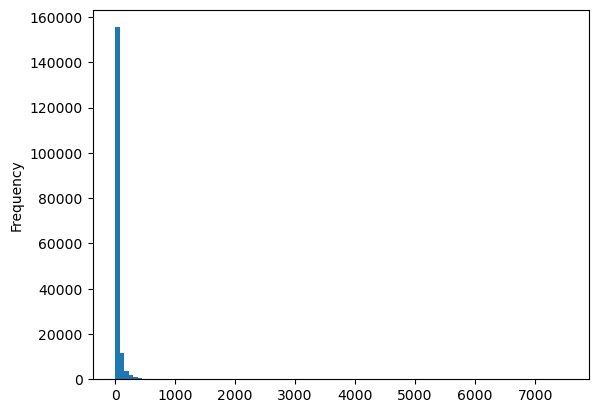

In [11]:
# %%
prices.plot.hist(bins=100)
plt.show()

Log scale helps us understand that most records in the dataset has prices below 100, several have prices in the end of range.

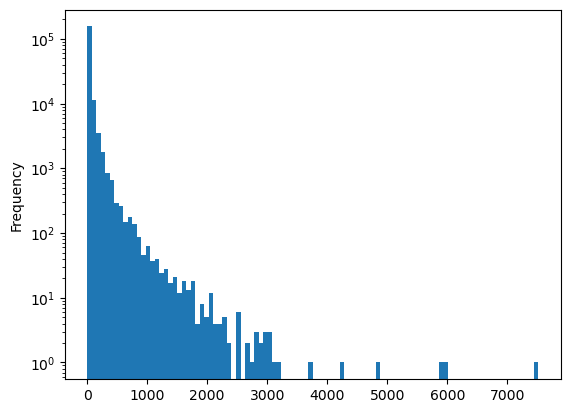

In [12]:
# %%
prices.plot.hist(bins=100, log=True)
plt.show()

### 3.2 Boxplot

Boxplot helps us to visualize statistical properties of the dataset. Range of prices is too great so we'll apply log10 for the sake of readability (though it will affect the distribution).
As was mentioned above, several products have prices of several thousands.

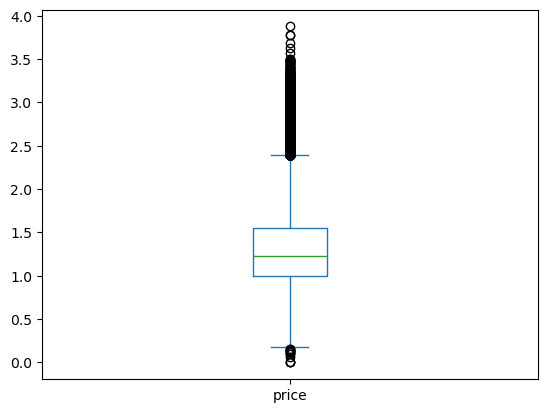

In [13]:
# %%
log_prices = np.log10(prices + 1)  # add 1 to avoid log(0)
log_prices.plot.box()
plt.show()

# Part 3: Ratings

In [14]:
# %%
# We exclude 0-star ratings as they mean "not rated"
ratings = data.query("stars!=0").groupby("asin").nth(1).loc[:, "stars"]
mean = ratings.mean()
median = ratings.median()
mode = ratings.mode()[0]

In [15]:
variance = ratings.var()
std = ratings.std()
rating_range = ratings.max() - ratings.min()
rating_interquartile_range = ratings.quantile(0.75) - ratings.quantile(0.25)

In [16]:
# %%
markdown_text = f"""
## 1. Central tendency

Average rating of products is *{mean:.2f}*, median rating is *{median:.2f}*, and mode rating is *{mode:.2f}*.

As we see, average and median are almost the same thus indicating non-skewed distribution.
"""
display(Markdown(markdown_text))


## 1. Central tendency

Average rating of products is *4.37*, median rating is *4.40*, and mode rating is *4.50*.

As we see, average and median are almost the same thus indicating non-skewed distribution.


In [17]:
# %%
markdown_text = f"""
## 2. Dispersion

Spread of ratings is *{rating_range:.2f}* since we expected both lowest value of 1 and highest of 5 in the dataset.. Variance and standard deviation are small: *{variance:.2f}* and *{std:.2f}* correspondingly, meaning that most users rate the products 4-5 stars and probably most unsatisfied users rate with the lowest of 1.
"""
display(Markdown(markdown_text))
print(markdown_text)


## 2. Dispersion

Spread of ratings is *4.00* since we expected both lowest value of 1 and highest of 5 in the dataset.. Variance and standard deviation are small: *0.22* and *0.47* correspondingly, meaning that most users rate the products 4-5 stars and probably most unsatisfied users rate with the lowest of 1.



## 2. Dispersion

Spread of ratings is *4.00* since we expected both lowest value of 1 and highest of 5 in the dataset.. Variance and standard deviation are small: *0.22* and *0.47* correspondingly, meaning that most users rate the products 4-5 stars and probably most unsatisfied users rate with the lowest of 1.



In [18]:
# %%
markdown_text = f"""
## 2. Shape of distribution

Skewness of ratings is *{ratings.skew():.2f}* and kurtosis is *{ratings.kurtosis():.2f}*.

Skewness is negative, meaning that left tail is longer than the right one. This is expected as most users rate products with 4-5 stars.

Kurtosis is positive, meaning that distribution has heavier tails and sharper peak than the normal distribution. This is also expected as most users rate products with 4-5 stars.
"""
display(Markdown(markdown_text))
print(markdown_text)


## 2. Shape of distribution

Skewness of ratings is *-2.39* and kurtosis is *11.61*.

Skewness is negative, meaning that left tail is longer than the right one. This is expected as most users rate products with 4-5 stars.

Kurtosis is positive, meaning that distribution has heavier tails and sharper peak than the normal distribution. This is also expected as most users rate products with 4-5 stars.



## 2. Shape of distribution

Skewness of ratings is *-2.39* and kurtosis is *11.61*.

Skewness is negative, meaning that left tail is longer than the right one. This is expected as most users rate products with 4-5 stars.

Kurtosis is positive, meaning that distribution has heavier tails and sharper peak than the normal distribution. This is also expected as most users rate products with 4-5 stars.



## 3. Visualization

The shape of histogram support our findings from above.

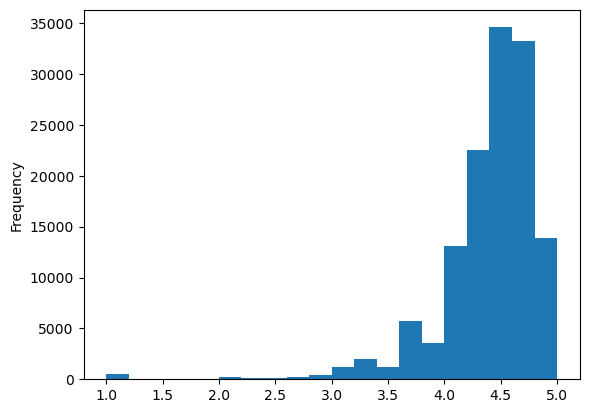

In [19]:
# %%
ratings.plot.hist(bins=20)
plt.show()

# Results

- Category "Sports & Outdoors" dominates over the rest, the rest listings are distributed more or less uniformly across popular categories.
- Prices have quite a great spread due to few products in the high price segment (in thousands GBP) though majority of the products fall between 0 and 100 GBP. It indicates that user usually searching for cheap items but sometimes for something big and expensive.
- Ratings are scattered across 4 and 5 while angry clients stick to 1 or 2 (those are picking up on the histogram). Worth to mention that most items don't have ratings.